# Exercises

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
diamonds = pd.read_csv('diamonds.csv',index_col=0)

## Task 1: Basics

- have a look at the diamonds dataset: how many rows do we have?, what are the different columns?
- create a DataFrame consisting only of the x, y and z columns
- access row 5 to 15 in diamonds
- create a DataFrame consisting only of row 5 to 15 and name the rows "A" to "K" (hint: each DataFrame has an .index attribute which can be modified)
- access row "C" in the DataFrame you just created
- use the mixed access operator (.ix) to get the price of the 500th diamond
- group the diamnods by color and compute the mean of the price
- find all the diamonds with more than 2 carat and plot their price distribution in a histogram
- compute and plot the standard deviation of the x dimension for the different cuts



cut
Fair         0.964317
Good         1.057301
Ideal        1.064210
Premium      1.188252
Very Good    1.100839
Name: x, dtype: float64

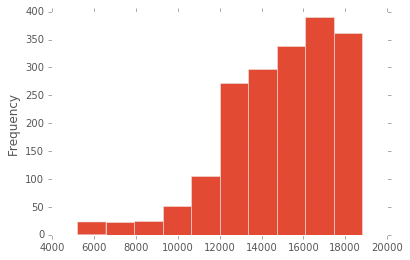

In [58]:
# no. rows
len(diamonds)

# x,y,z dataframe
df_xyz = diamonds[ ['x','y','z'] ]

# row 5 to 15
d515 = diamonds.iloc[4:15]

# row 5 by name
a_o = [chr(i) for i in range(65,76)] # generate a list of letters A-O
d515.index = a_o

# row C
d515.loc["C"]

# price of 500th diamond
diamonds.ix[500, 'price']

# price by color
diamonds.groupby("color")["price"].mean()

# diamonds with >2 carat
diamonds[diamonds['carat']>2]['price'].plot(kind='hist')

# std of x for diff. cuts
diamonds.groupby('cut')['x'].std()

###Task 2: Import the "Kernmerkmale Bevölkerung (Geschlecht, Deutsche/Ausländer, 5 Altersgruppen)" data set

https://www.destatis.de/DE/PresseService/Presse/Pressekonferenzen/2013/Zensus2011/zensus_pk.html

download the excel file and use the `read_excel` method in pandas (hint: useful arguments are `sheetname`, `header` and `index_col`

In [116]:
demo = pd.read_excel("demo_excel.xls", sheetname="Demographie", header=3, index_col="AGS")

### Task 4: Create a new DataFrame containing only the "Bundesländer" (hint: use the corresponding SATZART key)

In [74]:
df_bl = demo[demo["SATZART"]==10]
df_bl.index = df_bl["NAME"]
df_bl

,SATZART,NAME,EWZ,EW_M,EW_W,EW_D,EW_A,ALTER_1,ALTER_2,ALTER_3,ALTER_4,ALTER_5
NAME,,,,,,,,,,,,
Schleswig-Holstein,10,Schleswig-Holstein,2800119,1360530,1439590,2683670,116450,477010,362390,790060,563490,607170
Hamburg,10,Hamburg,1706696,826140,880560,1495810,210890,267800,275420,537600,301700,324180
Niedersachsen,10,Niedersachsen,7777992,3804410,3973590,7351250,426750,1356370,1049040,2188170,1569480,1614940
Bremen,10,Bremen,650863,316110,334750,580340,70520,98850,105260,181880,126940,137940
Nordrhein-Westfalen,10,Nordrhein-Westfalen,17538251,8521230,9017020,15931170,1607080,2984650,2481470,4993250,3525620,3553260
Hessen,10,Hessen,5971816,2914740,3057080,5311720,660090,1005660,834310,1746430,1205160,1180260
Rheinland-Pfalz,10,Rheinland-Pfalz,3989808,1950420,2039380,3718250,271560,664260,562230,1109500,841540,812270
Baden-Württemberg,10,Baden-Württemberg,10486660,5133480,5353190,9353030,1133630,1853540,1547500,2997710,2053400,2034520
Bayern,10,Bayern,12397614,6062910,6334700,11383180,1014430,2112190,1797760,3613220,2459360,2415070


### Task 5: Plot the age composition of the different Bundesländer

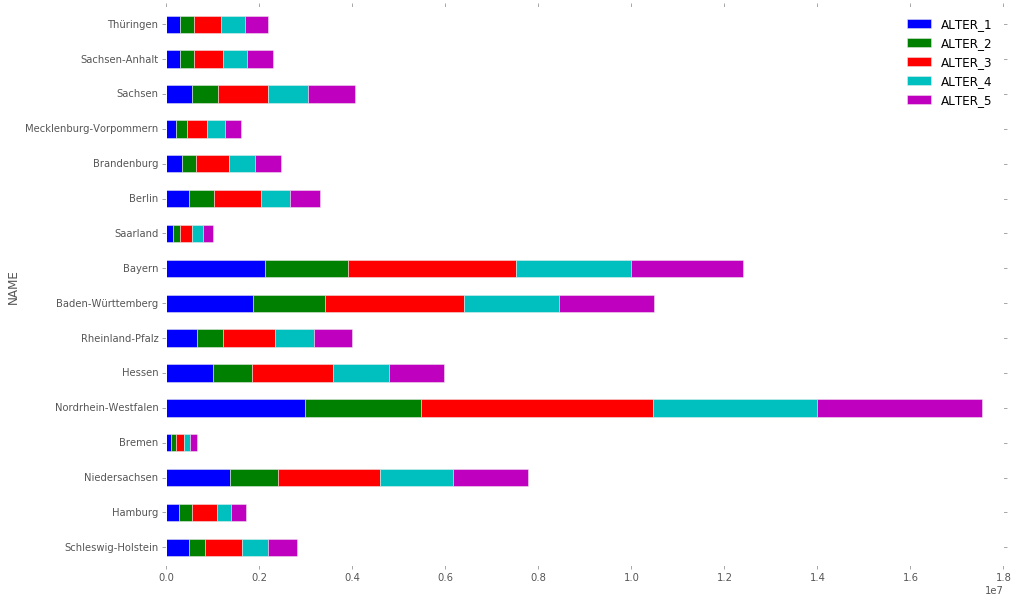

In [78]:
age_cols = [x for x in df_bl if 'ALTER' in x ]
df_bl[age_cols].plot(kind='barh',stacked=True,figsize=(15,10))


### Task 6: ...and now relative to the population in each Bundesland (hint the .div method of a DataFrame can be used to divide two dataframes)

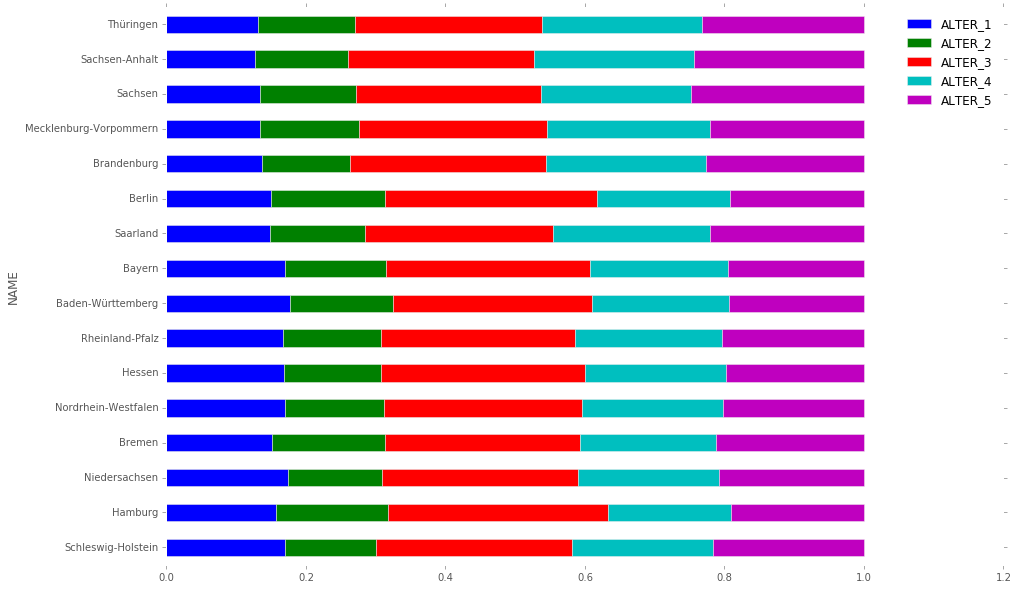

In [86]:
df_bl_norm = df_bl[age_cols].div( df_bl["EWZ"], axis=0 )
df_bl_norm[age_cols].plot(kind='barh',stacked=True,figsize=(15,10))


### Task 7: Plot pie charts of the relative age distribution in Berlin and Sachsen

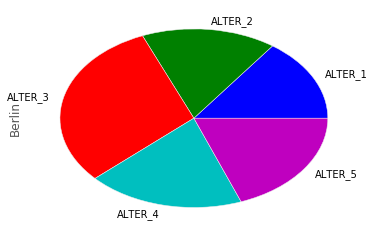

In [89]:
df_bl_norm.loc["Berlin"].plot(kind="pie")

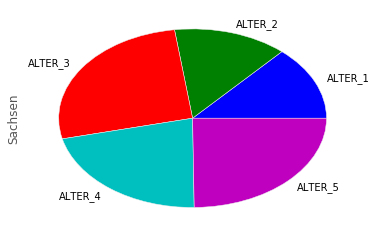

In [90]:
df_bl_norm.loc["Sachsen"].plot(kind="pie")

###Task 8: Import a health care data set from Zeit online 

The file is in the git repository: `multiresistente_keime.xlsx`. Import it using the `read_excel` function.


In [95]:
df_keime = pd.read_excel("multiresistente_keime.xlsx")
df_keime

,Kreisschlussel,Bundesland,Landkreis/Kreisfreie Stadt,Krankenhaus- Patienten 2013,MRE-Fälle 2013,MRE-Fälle pro 1000 Krankenhauspatienten 2013,ESBL-Diagnosen 2013,ESBL-Diagnosen pro 1000 Krankenhauspatienten 2013,VRE-Diagnosen 2013,VRE Diagnosen pro 1000 Krankenhauspatienten 2013,MRSA-Diagnosen 2013,MRSA Diagnosen pro 1000 Krankenhauspatienten 2013,MRE Veränderung 2010-2013 in %,ESBL Veränderung 2010-2013 in %,VRE Veränderung 2010-2013 in %,MRSA Veränderung 2010-2013 in %,MRSA Meldungen an Robert Koch-Institut 2013
0,1057,Schleswig-Holstein,Plön,26634,97,3.641961,126,4.730795,33,1.239018,184,6.908463,-13,26,57,-2,-
1,6431,Hessen,Bergstraße,54563,315,5.773143,289,5.296630,113,2.071000,315,5.773143,-8,46,92,-17,-
2,6635,Hessen,Waldeck-Frankenberg,44049,385,8.740267,450,10.215896,114,2.588027,478,10.851552,107,217,268,90,-
3,7111,Rheinland-Pfalz,"Koblenz, kreisfreie Stadt",24518,167,6.811322,155,6.321886,40,1.631454,180,7.341545,24,52,400,14,-
4,7313,Rheinland-Pfalz,"Landau in der Pfalz, kreisfreie Stadt",11227,51,4.542620,135,12.024584,24,2.137704,37,3.295627,19,146,-4,-5,-
5,7317,Rheinland-Pfalz,"Pirmasens, kreisfreie Stadt",11080,57,5.144404,90,8.122744,17,1.534296,96,8.664260,-42,88,70,-28,-
6,7319,Rheinland-Pfalz,"Worms, kreisfreie Stadt",19288,140,7.258399,161,8.347159,82,4.251348,129,6.688096,51,274,310,22,-
7,7333,Rheinland-Pfalz,Donnersbergkreis,18823,54,2.868831,183,9.722148,70,3.718855,87,4.622005,15,103,75,-38,-
8,7335,Rheinland-Pfalz,"Kaiserslautern, Kreis",22337,70,3.133814,184,8.237454,86,3.850114,112,5.014102,-20,117,8,-24,-
9,7336,Rheinland-Pfalz,Kusel,18611,74,3.976143,152,8.167213,84,4.513460,137,7.361238,-40,62,2,-29,-


### Task 9: Merge the two data sets (hint: "Kreisschlüssel" is the same as "AGS")

In [129]:
df_merged = pd.merge(demo, df_keime, left_index=True, right_on="Kreisschlussel" )
df_merged.head()

,SATZART,NAME,EWZ,EW_M,EW_W,EW_D,EW_A,ALTER_1,ALTER_2,ALTER_3,...,ESBL-Diagnosen pro 1000 Krankenhauspatienten 2013,VRE-Diagnosen 2013,VRE Diagnosen pro 1000 Krankenhauspatienten 2013,MRSA-Diagnosen 2013,MRSA Diagnosen pro 1000 Krankenhauspatienten 2013,MRE Veränderung 2010-2013 in %,ESBL Veränderung 2010-2013 in %,VRE Veränderung 2010-2013 in %,MRSA Veränderung 2010-2013 in %,MRSA Meldungen an Robert Koch-Institut 2013
180,40,"Flensburg, Stadt",82258,40660,41590,77140,5120,12150,15640,22130,...,3.482856,4,0.240197,166,9.968174,43,23,-43,80,8
156,40,"Kiel, Landeshauptstadt",235782,113400,122380,219670,16120,33940,49130,67910,...,4.106988,116,2.394023,377,7.780575,16,107,404,41,10
82,40,"Lübeck, Hansestadt",210305,99880,110420,197390,12910,31590,31520,58380,...,5.908388,84,1.804744,540,11.601925,32,65,87,55,20
241,40,"Neumünster, Stadt",77249,37650,39600,72470,4780,12900,11320,20820,...,5.589520,26,1.513828,216,12.576419,84,8,550,19,5
166,40,Dithmarschen,133900,65480,68420,130720,3180,23830,16270,35430,...,3.389161,4,0.131618,312,10.266197,-15,8,-43,-3,9


###  Task 10: Plot number of hospitalized patients per inhabitant against relative number of old people (65+)

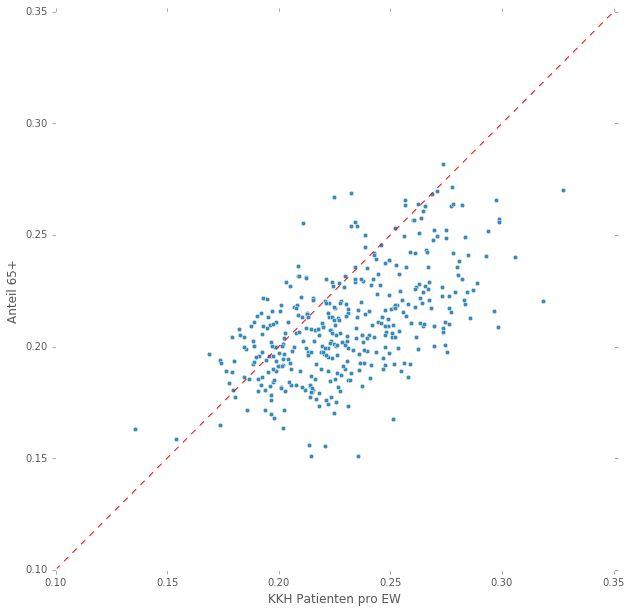

In [132]:
df_merged['KKH Patienten pro EW'] = df_merged['Krankenhaus- Patienten 2013']/df_merged['EWZ']
df_merged['Anteil 65+'] = df_merged['ALTER_5']/df_merged['EWZ']

df_merged.plot(x="KKH Patienten pro EW", y="Anteil 65+", kind="scatter", figsize=(10,10),xlim=[.1,.35],ylim=[.1,.35])
plt.plot([.1,.35],[.1,.35],'--r')

### Task 11: Compute the correlation

In [134]:
df_merged[['KKH Patienten pro EW','Anteil 65+']].corr()

,KKH Patienten pro EW,Anteil 65+
KKH Patienten pro EW,1.000000,0.576673
Anteil 65+,0.576673,1.000000
